# What proportion of TV shows on TMDB have more than 30 episodes?

In [1]:
pip install tmdbsimple

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for tmdbsimple from https://files.pythonhosted.org/packages/6c/dd/ade05d202db728b23e54aa0959622d090776023917e7308c1b2469a07b76/tmdbsimple-2.9.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [7]:
import requests
import pandas as pd
import random
import time

API_KEY = "864b97e0481ef59b6a1117399f79e2f8"
BASE_URL = "https://api.themoviedb.org/3"
NUM_TRIALS = 100

session = requests.Session()
dfp = []

def get_random_tv_shows(n=10):
    page = random.randint(1, 500)
    url = f"{BASE_URL}/tv/popular?api_key={API_KEY}&language=en-US&page={page}"
    response = session.get(url)
    data = response.json()
    results = data.get("results", [])
    return random.sample(results, min(n, len(results)))

def get_episode_count(tv_id):
    url = f"{BASE_URL}/tv/{tv_id}?api_key={API_KEY}&language=en-US"
    response = session.get(url)
    if response.status_code != 200:
        return 0  # fallback if request fails
    data = response.json()
    seasons = data.get("seasons", [])
    total_episodes = sum(season.get("episode_count", 0) for season in seasons)
    return total_episodes

for trial in range(NUM_TRIALS):
    shows = get_random_tv_shows(10)
    time.sleep(0.3)  # Pause briefly between API calls

    show_data = []
    for show in shows:
        tv_id = show["id"]
        title = show["name"]
        episodes = get_episode_count(tv_id)
        show_data.append({"Title": title, "Total Episodes": episodes})
        time.sleep(0.25)  # Pause between each show to stay under rate limits

    df = pd.DataFrame(show_data)
    count = (df["Total Episodes"] > 30).sum()
    proportion = count / len(df)
    dfp.append(proportion)

    # Optional progress update
    print(f"Trial {trial+1}/{NUM_TRIALS} complete – proportion: {proportion:.2f}")
mean = sum(dfp)/len(dfp)
print("\nAverage proportion over all trials:", mean)


Trial 1/100 complete – proportion: 0.50
Trial 2/100 complete – proportion: 0.80
Trial 3/100 complete – proportion: 0.90
Trial 4/100 complete – proportion: 1.00
Trial 5/100 complete – proportion: 0.70
Trial 6/100 complete – proportion: 0.60
Trial 7/100 complete – proportion: 0.90
Trial 8/100 complete – proportion: 0.30
Trial 9/100 complete – proportion: 0.70
Trial 10/100 complete – proportion: 0.90
Trial 11/100 complete – proportion: 0.60
Trial 12/100 complete – proportion: 0.80
Trial 13/100 complete – proportion: 0.50
Trial 14/100 complete – proportion: 0.60
Trial 15/100 complete – proportion: 0.50
Trial 16/100 complete – proportion: 0.80
Trial 17/100 complete – proportion: 0.40
Trial 18/100 complete – proportion: 0.70
Trial 19/100 complete – proportion: 0.80
Trial 20/100 complete – proportion: 0.60
Trial 21/100 complete – proportion: 0.90
Trial 22/100 complete – proportion: 0.60
Trial 23/100 complete – proportion: 0.40
Trial 24/100 complete – proportion: 0.60
Trial 25/100 complete – p

Standard Deviation: 0.16016405730539313
Mean:  0.7020000000000002


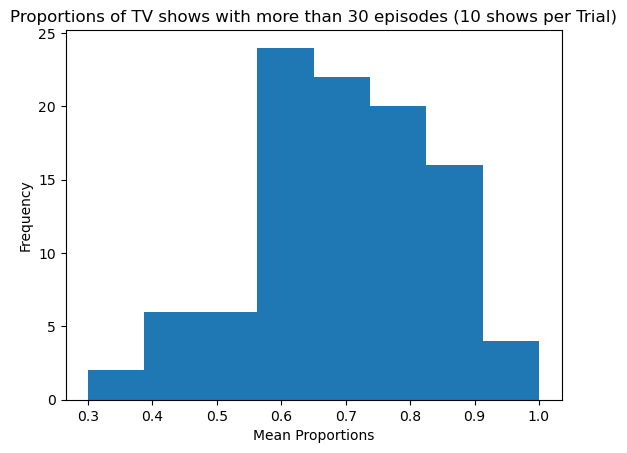

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

std_dev = pd.Series(dfp).std()
print("Standard Deviation:", std_dev)
print("Mean: ", mean)
plt.hist(dfp, bins=8)
plt.title("Proportions of TV shows with more than 30 episodes (10 shows per Trial)")
plt.xlabel("Mean Proportions")
plt.ylabel("Frequency")
plt.show()


In [14]:
import requests
import pandas as pd
import random
numTrials = 10
count = 0

# Your TMDB API key
API_KEY = "864b97e0481ef59b6a1117399f79e2f8"
BASE_URL = "https://api.themoviedb.org/3"

# Function to get a random page of popular shows
def get_random_tv_shows(n=numTrials):
    # TMDB popular TV shows have about 500 pages max
    page = random.randint(1, 500)
    url = f"{BASE_URL}/tv/popular?api_key={API_KEY}&language=en-US&page={page}"
    response = requests.get(url)
    data = response.json()
    results = data.get("results", [])

    # Pick up to n random shows from the page
    random_shows = random.sample(results, min(n, len(results)))
    return random_shows

# Function to get total episode count for a given show
def get_episode_count(tv_id):
    url = f"{BASE_URL}/tv/{tv_id}?api_key={API_KEY}&language=en-US"
    response = requests.get(url)
    data = response.json()
    seasons = data.get("seasons", [])
    
    # Sum the episode counts from each season
    total_episodes = sum(season.get("episode_count", 0) for season in seasons)
    return total_episodes

# Get 10 random shows
shows = get_random_tv_shows(numTrials)

# Create a list of show data
show_data = []
for show in shows:
    tv_id = show["id"]
    title = show["name"]
    episodes = get_episode_count(tv_id)
    if(episodes > 30):
        count = count + 1
    show_data.append({"Title": title, "Total Episodes": episodes})
# Convert to DataFrame
df = pd.DataFrame(show_data)
print(df)
tProb = count/numTrials
print("The Theoretical Probability is: ", tProb)

                          Title  Total Episodes
0                 Albion Market             100
1         Brave Police J-Decker              48
2                    Angel Eyes              21
3     The Deer and the Cauldron              50
4              Jupiter's Legacy               8
5  Love Is Indivisible by Twins              12
6                      Verão 90             154
7                     Beat Coin              78
8              La pecera de Eva             259
9                       Baskets              40
The Theoretical Probability is:  0.7


# Answer:
In this study, the histogram of the data doesn't quite pass the normality check, as it is slightly skewed left. The empirical probability, which is .702, was calculated using 100 trials of 10 TV show checks, and is close to the theoretical probability of .7.